In [0]:
import mglearn
import matplotlib.pyplot as plt
# matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


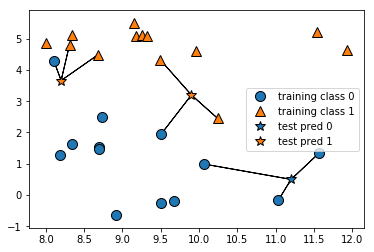

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
x, y = mglearn.datasets.make_forge()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
x
  

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [12]:
x.shape

(26, 2)

In [13]:
y


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

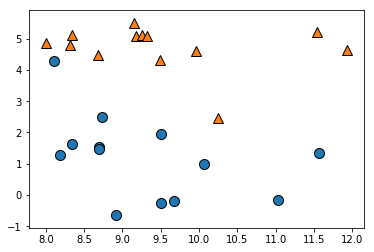

In [19]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)


In [24]:
x_train


array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [25]:
x_train.shape

(19, 2)

In [29]:
x_test.shape

(7, 2)

In [31]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
clf.predict(x_test)

array([1, 0, 1, 0, 1, 0, 0])

In [33]:
y_test


array([1, 0, 1, 0, 1, 1, 0])

In [34]:
clf.score(x_test,y_test)

0.8571428571428571

In [35]:
round(clf.score(x_test, y_test),3)

0.857

In [38]:
print("{:.2f}".format(clf.score(x_test, y_test)))

0.86


In [40]:
clf_10 = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8571428571428571

In [44]:
for n_neighbors in range(1,16):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    print("test set : n_neighbors={},{:.2f}".format(n_neighbors,clf.score(x_test, y_test)))

test set : n_neighbors=1,0.86
test set : n_neighbors=2,0.86
test set : n_neighbors=3,0.86
test set : n_neighbors=4,0.86
test set : n_neighbors=5,0.86
test set : n_neighbors=6,0.86
test set : n_neighbors=7,0.86
test set : n_neighbors=8,0.86
test set : n_neighbors=9,0.86
test set : n_neighbors=10,0.86
test set : n_neighbors=11,0.86
test set : n_neighbors=12,0.86
test set : n_neighbors=13,0.86
test set : n_neighbors=14,0.86
test set : n_neighbors=15,0.86


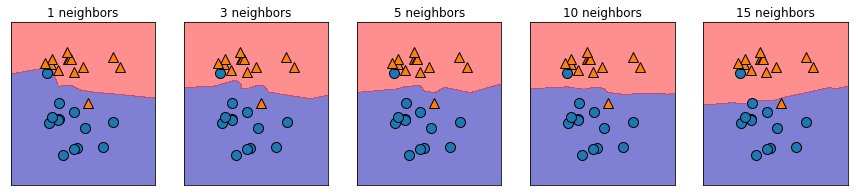

In [55]:
flg, axes = plt.subplots(1,5,figsize=(15,3))

for n_neighbors, ax in  zip([1,3,5,10,15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(x[:, 0],x[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))